In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
%matplotlib inline
sns.set_style('white')

Ridge regression shrinks parameter estimates(parameter meaning coefficients?)

In [2]:
#working with the air quality data again
df = pd.read_csv(
    'https://vincentarelbundock.github.io/Rdatasets/csv/ISLR/Default.csv'
).iloc[:,1:].dropna()

#recoding strings to numeric
df['default'] = np.where(df['default']=='Yes', 1, 0)
df['student'] = np.where(df['student']=='Yes', 1, 0)
names = df.columns
df = pd.DataFrame(preprocessing.scale(df), columns=names)

#define training and test set sizes
trainsize = int(df.shape[0]/2)
df_test = df.iloc[trainsize:, :].copy()
df_train = df.iloc[:trainsize, :].copy()

Y_train = df_train['income'].values.reshape(-1,1)
X_train = df_train[[c for c in df_train.columns if c != 'income']]

# Make some new features to capture potential quadratic and cubic
# relationships between solar radiation and day or temperature.
df_train['balance_student'] = df_train['balance'] * df_train['student']
df_train['balance_default'] = df_train['balance'] * df_train['default']
df_train['student_default'] = df_train['student'] * df_train['default']
df_train['balance_sqrt'] = (df_train['balance'] + 100) ** .5
df_train['balance2'] = (df_train['balance'] + 100) ** 2
df_train['balance3'] = (df_train['balance'] + 100) ** 3

X_train2 = df_train[[c for c in df_train.columns if c != 'income']]

#test the simpler model with smaller coefs
Y_test = df_test['income'].values.reshape(-1, 1)
X_test = df_test.loc[:, ~(df_test.columns).isin(['income'])]

# Test the more complex model with larger coefficients.
df_test['balance_student'] = df_test['balance'] * df_test['student']
df_test['balance_default'] = df_test['balance'] * df_test['default']
df_test['student_default'] = df_test['student'] * df_test['default']
df_test['balance_sqrt'] = (df_test['balance'] + 100) ** .5
df_test['balance2'] = (df_test['balance'] + 100) ** 2
df_test['balance3'] = (df_test['balance'] + 100) ** 3
X_test2 = df_test.loc[:, ~(df_test.columns).isin(['income'])]

In [3]:
#small number of params
lass = linear_model.Lasso(alpha = .35)
lassfit = lass.fit(X_train, Y_train)
print('R-Squared for the model with few features:')
print(lass.score(X_train, Y_train))

origparams = np.append(lassfit.coef_, lassfit.intercept_)

print('\nParameter estimates for the model with few features:')
print(origparams)

#large number of params
lassBig = linear_model.Lasso(alpha=.35)
lassBig.fit(X_train2, Y_train)
print('\nR-Squared for the model with many features:')
print(lassBig.score(X_train2, Y_train))

origparams = np.append(lassBig.coef_, lassBig.intercept_)

print('\nParameter estimates for the model with many features:')
print(origparams)

R-Squared for the model with few features:
0.450062579301

Parameter estimates for the model with few features:
[-0.         -0.40657726 -0.          0.00114596]

R-Squared for the model with many features:
0.443633767129

Parameter estimates for the model with many features:
[  0.00000000e+00  -3.89351238e-01   0.00000000e+00  -0.00000000e+00
   0.00000000e+00  -0.00000000e+00   0.00000000e+00  -2.77688887e-04
  -7.09158792e-07   3.48711577e+00]


In [4]:
#Checking the predictive power using the test set
print(lass.score(X_test, Y_test))
print(lassBig.score(X_test2, Y_test))

0.445532251512
0.438046634591


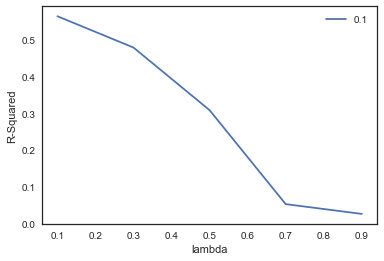

In [29]:
#Building a plot to show estimates
#estimates = np.append(lassBig.coef_, [10])

#legend info
labels = []

#running the model for multple alphas
#for lambd in range(1, 50, 2):
#    lassBig = linear_model.Lasso(alpha = lambd)
#    lassBig.fit(X_train2, Y_train)
#    estimates = np.row_stack((
#        estimates,
#        np.append(lassBig.coef_, [lambd])))
    
#making the data look better
#estimates_df = pd.DataFrame(
#    estimates,
#    columns = list(X_train2.columns) + ['lambda'])
#estimates_df.sort_values(by = 'lambda', inplace = True, ascending = True)

#leaving out the student variable since it's high values throw off plot scale
#varstoplot = list(estimates_df.columns[:9,])
#varstoplot.remove('student')

#plot a line for each parameter
r_list = []
alphas = [i for i in np.arange(0.1,1.0, 0.2)]
for lambd in alphas:
    lassBig = linear_model.Lasso(alpha = lambd)
    lassBig.fit(X_train2, Y_train)
    r_score = lassBig.score(X_train2, Y_train)
    r_list.append(r_score)
    labels.append(lambd)
plt.plot(labels, r_list)
plt.xlabel('lambda')
plt.ylabel('R-Squared')
plt.legend(labels)
plt.show()